Dataset loaded successfully.
Interactive map saved as 'restaurant_distribution_map.html'.


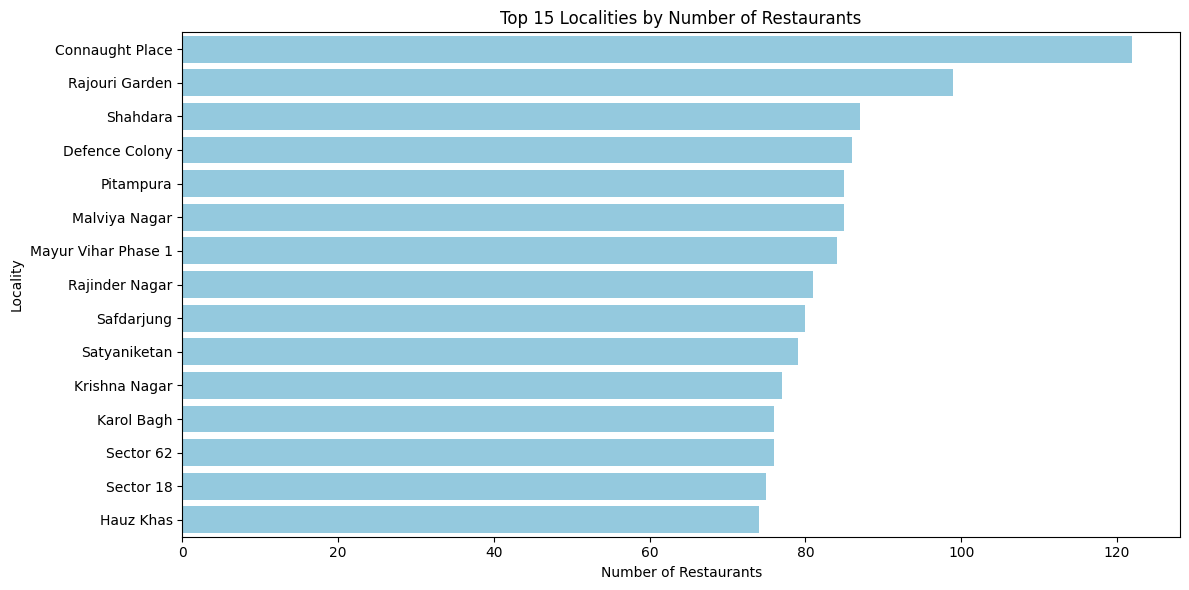

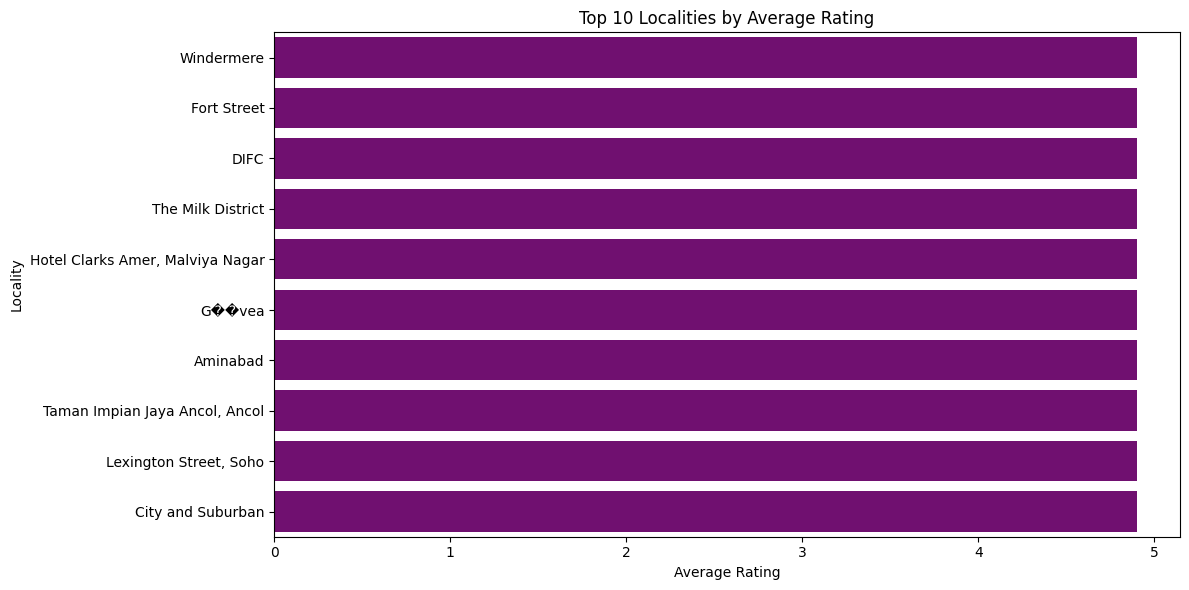

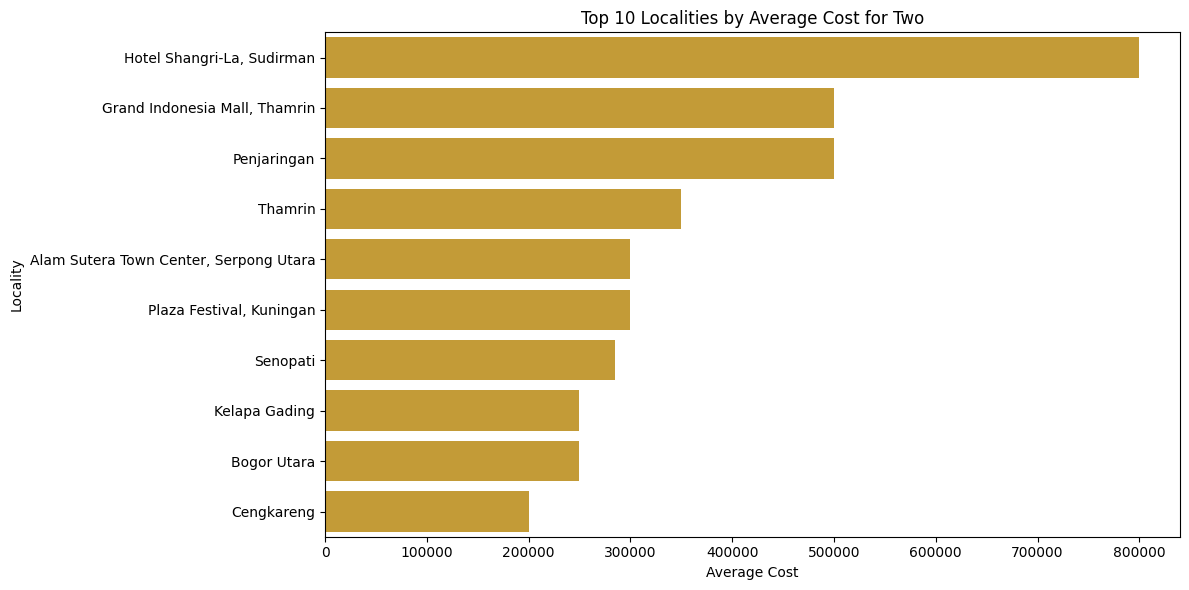

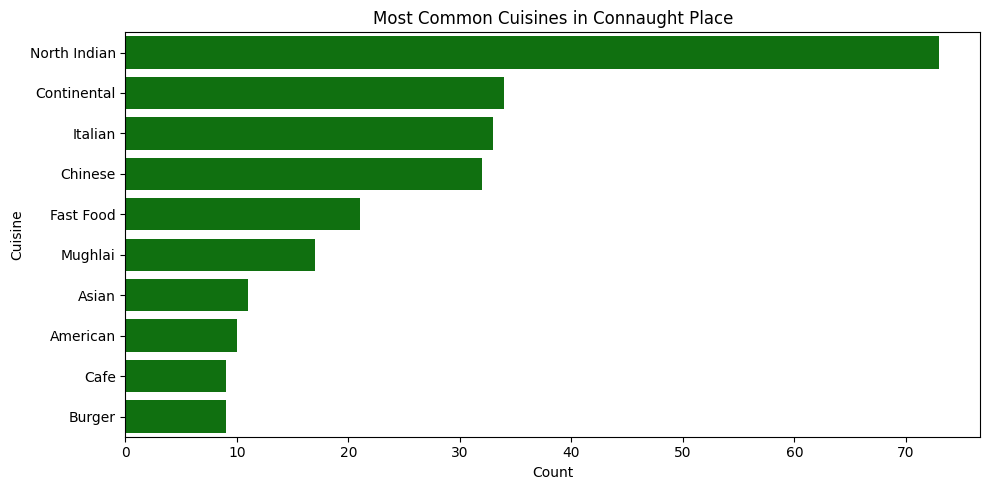

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from collections import Counter


df = pd.read_csv("D:\\intern\\Dataset .csv")
df = df.dropna()

print("Dataset loaded successfully.")

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)


marker_cluster = MarkerCluster().add_to(restaurant_map)

for i, row in df.iterrows():
    location = (row['Latitude'], row['Longitude'])
    name = row['Restaurant Name']
    rating = row['Aggregate rating']
    locality = row['Locality']
    tooltip = f"{name} ({rating}/5) - {locality}"
    folium.Marker(location, tooltip=tooltip).add_to(marker_cluster)


restaurant_map.save("restaurant_distribution_map.html")
print("Interactive map saved as 'restaurant_distribution_map.html'.")


plt.figure(figsize=(12, 6))
locality_counts = df['Locality'].value_counts().head(15)
sns.barplot(x=locality_counts.values, y=locality_counts.index, color='skyblue')
plt.title("Top 15 Localities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()

avg_rating = df.groupby("Locality")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, color='purple')
plt.title("Top 10 Localities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()


avg_cost = df.groupby("Locality")["Average Cost for two"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost.values, y=avg_cost.index, color='goldenrod')
plt.title("Top 10 Localities by Average Cost for Two")
plt.xlabel("Average Cost")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()


top_locality = df['Locality'].value_counts().idxmax()
top_df = df[df['Locality'] == top_locality]


cuisine_list = top_df['Cuisines'].str.split(', ')
cuisine_counts = Counter([cuisine for sublist in cuisine_list for cuisine in sublist])
common_cuisines = pd.Series(cuisine_counts).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=common_cuisines.values, y=common_cuisines.index, color='green')
plt.title(f"Most Common Cuisines in {top_locality}")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()
